# 目录

# 1 方差筛选法

# 2 高成对相关性去除
 
# 3 Filter过滤法 

# 4 Wrapper包装法

# 5 Embedded嵌入法

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy.stats import norm
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import skew
from scipy.stats.stats import pearsonr

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
%run 3-特征转换_衍生.ipynb

In [14]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Columns: 620 entries, Id to AllPorchSF_minmax
dtypes: float64(91), int32(476), int64(26), object(27)
memory usage: 4.3+ MB


,Id,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearRemodAdd,...,OverallQual-s2_minmax,OverallQual-s3_minmax,OverallQual-Sq_minmax,GrLivArea-2_minmax,GrLivArea-3_minmax,GrLivArea-Sq_minmax,TotalBath_minmax,AllSF_minmax,AllFlrsSF_minmax,AllPorchSF_minmax
count,1458.000000,1458.000000,1458.000000,1458.0,1458.000000,1458.0,1458.0,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,730.251715,57.314129,9.096182,2.0,1.516872,4.0,3.0,6.095336,1.873338,1984.834019,...,0.662215,0.669588,0.593141,0.603512,0.603512,0.469856,0.235734,0.377695,0.558957,0.409781
std,421.601532,33.497417,0.473798,0.0,0.135067,0.0,0.0,1.371779,0.155629,20.641760,...,0.150198,0.148054,0.159656,0.136946,0.136946,0.147886,0.157773,0.132703,0.127416,0.382193
min,1.000000,0.000000,7.301485,2.0,0.916291,4.0,3.0,2.000000,1.504077,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.250000,42.000000,8.928706,2.0,1.386294,4.0,3.0,5.000000,1.791759,1967.000000,...,0.550000,0.560000,0.470000,0.510000,0.510000,0.360000,0.100000,0.280000,0.470000,0.000000
50%,730.500000,63.000000,9.156518,2.0,1.609438,4.0,3.0,6.000000,1.791759,1994.000000,...,0.670000,0.680000,0.590000,0.610000,0.610000,0.470000,0.200000,0.360000,0.570000,0.575000
75%,1094.750000,79.000000,9.358847,2.0,1.609438,4.0,3.0,7.000000,1.945910,2004.000000,...,0.770000,0.770000,0.700000,0.690000,0.690000,0.560000,0.300000,0.450000,0.640000,0.750000
max,1460.000000,190.000000,10.075190,2.0,1.609438,4.0,3.0,10.000000,2.302585,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# 筛选出连续型变量，以下都是对连续型变量的筛选处理
train_num = train.select_dtypes(include = [np.number]).drop(labels = ['Id', 'SalePrice_log'], axis = 1)
train_num.shape

(1458, 591)

# 1 方差筛选法

In [18]:
# 去掉低方差, 没有波动的变量
from sklearn.feature_selection import VarianceThreshold

varthreshold = 0.01
sel_varthres = VarianceThreshold(threshold = varthreshold)
sel_varthres.fit(train_num)

sel_not_varthres_var = train_num.columns[np.logical_not(sel_varthres.get_support())] # get_support()返回布尔值数组，np.logical_not()对布尔数组取反
sel_varthres_var = train_num.columns[(sel_varthres.get_support())]
sel_not_varthres_var

,threshold,0.01


Index(['Street', 'Utilities', 'LandSlope', 'ExterCond', 'BsmtCond',
       'BsmtFinType2', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',
       'KitchenAbvGr',
       ...
       'KitchenAbvGr_minmax', 'Functional_minmax', 'GarageQual_minmax',
       'GarageCond_minmax', 'PavedDrive_minmax', 'EnclosedPorch_minmax',
       '3SsnPorch_minmax', 'ScreenPorch_minmax', 'PoolArea_minmax',
       'MiscVal_minmax'],
      dtype='object', length=279)

(array([   0.,    0.,    0.,    0.,    0., 1458.,    0.,    0.,    0.,
           0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <BarContainer object of 10 artists>)

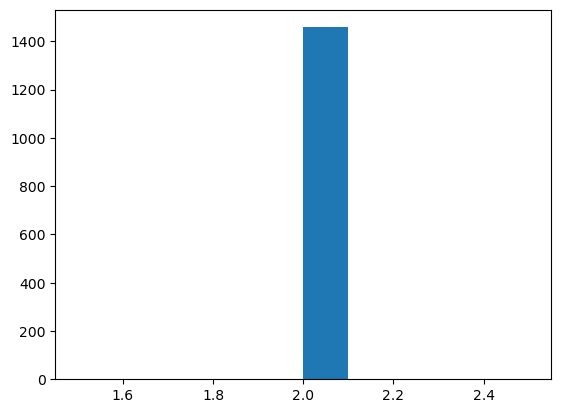

In [20]:
plt.hist(train_num['Street']) # 查看一个被丢弃的，明显取值都是一个，没有区分意义

In [22]:
featurefilter_sel_varthres_var = sel_varthres_var

In [23]:
# 取筛选后的数据
train_num = train_num[featurefilter_sel_varthres_var]
train_num.shape

(1458, 312)

# 2 高成对相关性去除

In [24]:
# 相关性计算
corrbase = train_num.corr()

In [29]:
# 只保留对角线上方，这样不会处理重复的"成对相关列"
corr = pd.DataFrame(np.triu(corrbase.values, k=1), index=corrbase.index, columns=corrbase.columns) 
# triu上三角矩阵提取函数: k=0：保留主对角线及上方（默认值）; k=1：主对角线也置为 0，只保留主对角线上方的元素 ; k=-1：保留主对角线及下方（下三角）

In [30]:
# 得到高相关"成对相关列"的索引list
nonzerolist = np.transpose(np.nonzero((corr[corr>0.7].fillna(0).values))) # np.nonzero() → 找出所有非零值的位置; np.transpose() → 转置索引，整理成 “成对索引”

In [59]:
# 与y值的相关性统计
numeric_cols = train.select_dtypes(include=['int64', 'float64', 'int32']).drop(labels = ['Id'], axis = 1).columns
corr_y = train[numeric_cols].corr()['SalePrice_log']

In [60]:
corr_y.index

Index(['LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       ...
       'OverallQual-s2_minmax', 'OverallQual-s3_minmax',
       'OverallQual-Sq_minmax', 'GrLivArea-2_minmax', 'GrLivArea-3_minmax',
       'GrLivArea-Sq_minmax', 'TotalBath_minmax', 'AllSF_minmax',
       'AllFlrsSF_minmax', 'AllPorchSF_minmax'],
      dtype='object', length=592)

In [61]:
corr.columns[nonzerolist[:, 0]] # 查看下高成对相关列
corr.columns[nonzerolist[:, 1]]

Index(['LotFrontage', 'LotArea', 'LotShape', 'OverallQual', 'OverallQual',
       'OverallQual', 'OverallQual', 'OverallQual', 'OverallQual',
       'OverallQual',
       ...
       'GrLivArea-2_minmax', 'GrLivArea-2_minmax', 'GrLivArea-2_minmax',
       'GrLivArea-2_minmax', 'GrLivArea-3_minmax', 'GrLivArea-3_minmax',
       'GrLivArea-3_minmax', 'GrLivArea-Sq_minmax', 'GrLivArea-Sq_minmax',
       'AllSF_minmax'],
      dtype='object', length=252)

Index(['LotFrontage_minmax', 'LotArea_minmax', 'LotShape_minmax', 'ExterQual',
       'OverallQual-s2', 'OverallQual-s3', 'OverallQual-Sq',
       'OverallQual_minmax', 'ExterQual_minmax', 'OverallQual-s2_minmax',
       ...
       'GrLivArea-3_minmax', 'GrLivArea-Sq_minmax', 'AllSF_minmax',
       'AllFlrsSF_minmax', 'GrLivArea-Sq_minmax', 'AllSF_minmax',
       'AllFlrsSF_minmax', 'AllSF_minmax', 'AllFlrsSF_minmax',
       'AllFlrsSF_minmax'],
      dtype='object', length=252)

In [62]:
# 通过与y的相关性做筛选的条件，最终结果
corr_high = pd.DataFrame({'corr_column1' : corr.columns[nonzerolist[:, 0]],
                          'corr_column1_y' : corr_y[corr.columns[nonzerolist[:, 0]]].values,
                          'corr_column2' : corr.columns[nonzerolist[:, 1]],
                          'corr_column2_y' : corr_y[corr.columns[nonzerolist[:, 1]]].values
                          }, index = np.arange(nonzerolist.shape[0]))

In [68]:
corr_high.head(10)

,corr_column1,corr_column1_y,corr_column2,corr_column2_y
0,LotFrontage,0.179219,LotFrontage_minmax,0.178172
1,LotArea,0.403085,LotArea_minmax,0.403395
2,LotShape,-0.286124,LotShape_minmax,-0.285821
3,OverallQual,0.820833,ExterQual,0.681264
4,OverallQual,0.820833,OverallQual-s2,0.807070
5,OverallQual,0.820833,OverallQual-s3,0.805747
6,OverallQual,0.820833,OverallQual-Sq,0.816112
7,OverallQual,0.820833,OverallQual_minmax,0.821349
8,OverallQual,0.820833,ExterQual_minmax,0.681134
9,OverallQual,0.820833,OverallQual-s2_minmax,0.805127


In [69]:
# 需要找出来要删除的列名，如果找出保留的的列会不准确，因为可能会在另一个"成对相关列"中被删除
corr_high_delete = corr_high.apply(lambda row: row[0] if row[1]<row[3] else row[2], axis=1)
corr_high_delete.drop_duplicates(inplace=True)

In [70]:
featurefilter_corr_high_delete = corr_high_delete

In [71]:
# 删除高相关对
train_num = train_num.drop(labels=featurefilter_corr_high_delete, axis=1)
train_num.shape

(1458, 186)

# 3 Filter过滤法

In [73]:
# 相关系数法pearsonr, 或者直接用corr阈值法
from sklearn.feature_selection import SelectPercentile
from scipy.stats import pearsonr
import numpy as np  

sel_percentbest = SelectPercentile(lambda X, Y: np.array(list(map(lambda x:pearsonr(x, Y)[0], X.T))).T, percentile=80) 
# 注意pearsonr(x, Y)[0]，这里[0]：取元组的第一个值（相关系数），忽略 p 值，只需要相关性分数
# map把内层lambda函数映射到X.T这个可迭代的转置矩阵的每个元素
# np.array把 map 返回的迭代器转换成 NumPy 数组： (特征数， )    也就是「特征数」的一维数组
# percentile=80：保留前80%
sel_percentbest.fit(train_num, train['SalePrice_log'])

sel_percentbest_var = train_num.columns[sel_percentbest.get_support()]
sel_percentbest_var

,score_func,<function <la...0020FC63F1F30>
,percentile,80


Index(['LotFrontage', 'MasVnrArea', 'BsmtUnfSF', 'BsmtFullBath', 'HalfBath',
       'Fireplaces', 'WoodDeckSF', 'AllSF', 'MSSubClass_120', 'MSSubClass_20',
       ...
       'OverallCond_minmax', 'YearRemodAdd_minmax', 'BsmtExposure_minmax',
       'BsmtFinType1_minmax', 'HeatingQC_minmax', 'FullBath_minmax',
       'BedroomAbvGr_minmax', 'GarageCars_minmax', 'OpenPorchSF_minmax',
       'TotalBath_minmax'],
      dtype='object', length=148)

In [74]:
featurefilter_sel_percentbest_var = sel_percentbest_var

In [77]:
# @@处理@@
train_num = train_num[featurefilter_sel_percentbest_var]

train_num.shape

(1458, 148)

# 4 Wrapper包装法

In [78]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

#以模型的预测性能为导向，筛选出对模型最有用的特征
rf = RandomForestRegressor(random_state=30)
sel_rfe = RFE(rf, n_features_to_select = int(train_num.shape[1]*0.8))
# 执行特征选择（训练+递归删除）
sel_rfe.fit(train_num, train['SalePrice_log'])

sel_rfe_var = train_num.columns[sel_rfe.get_support()]
sel_rfe_var

,estimator,RandomForestR...ndom_state=30)
,n_features_to_select,118
,step,1
,verbose,0
,importance_getter,'auto'
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


Index(['LotFrontage', 'MasVnrArea', 'BsmtUnfSF', 'BsmtFullBath', 'HalfBath',
       'Fireplaces', 'WoodDeckSF', 'AllSF', 'MSSubClass_120', 'MSSubClass_20',
       ...
       'OverallCond_minmax', 'YearRemodAdd_minmax', 'BsmtExposure_minmax',
       'BsmtFinType1_minmax', 'HeatingQC_minmax', 'FullBath_minmax',
       'BedroomAbvGr_minmax', 'GarageCars_minmax', 'OpenPorchSF_minmax',
       'TotalBath_minmax'],
      dtype='object', length=118)

In [79]:
featurefilter_sel_rfe_var = sel_rfe_var

In [81]:
# @@处理@@
train_num = train_num[featurefilter_sel_rfe_var]
train_num.shape

(1458, 118)

# 5 Embedded嵌入法

In [82]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, random_state=30)
sel_frommodel = SelectFromModel(rf, threshold = '0.5*median')
"""
关键参数解释：
- rf：基模型（必须能输出特征重要性/系数，如随机森林、线性模型）；
- threshold：特征筛选阈值，这里是'0.5*median' → 保留「特征重要性 ≥ 所有特征重要性中位数的50%」的特征；
  其他常用阈值：
  - 'mean'：保留≥均值的特征；
  - 'median'：保留≥中位数的特征；
  - 具体数值（如0.01）：保留重要性≥0.01的特征。
"""

sel_frommodel.fit(train_num, train['SalePrice_log'])
sel_frommodel_var = train_num.columns[sel_frommodel.get_support()]
sel_frommodel_var

"\n关键参数解释：\n- rf：基模型（必须能输出特征重要性/系数，如随机森林、线性模型）；\n- threshold：特征筛选阈值，这里是'0.5*median' → 保留「特征重要性 ≥ 所有特征重要性中位数的50%」的特征；\n  其他常用阈值：\n  - 'mean'：保留≥均值的特征；\n  - 'median'：保留≥中位数的特征；\n  - 具体数值（如0.01）：保留重要性≥0.01的特征。\n"

,estimator,RandomForestR...ndom_state=30)
,threshold,'0.5*median'
,prefit,False
,norm_order,1
,max_features,None
,importance_getter,'auto'
,n_estimators,400
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


Index(['LotFrontage', 'MasVnrArea', 'BsmtUnfSF', 'BsmtFullBath', 'HalfBath',
       'Fireplaces', 'WoodDeckSF', 'AllSF', 'MSSubClass_20', 'MSSubClass_60',
       'MSSubClass_70', 'MSSubClass_80', 'MSZoning_RL', 'LandContour_HLS',
       'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_Inside', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'BldgType_1Fam', 'YearBuilt_1941', 'YearBuilt_1965', 'YearBuilt_1977',
       'RoofStyle_Hip', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd',
       'Exterior1st_Plywood', 'Exterior2nd_BrkFace', 'Exterior2nd_HdBoard',
       'Exterior2nd_VinylSd', 'Foundation_PConc', 'BsmtQual_4.0',
       'BsmtQual_5.0', 'Heating_GasA', 'CentralAir_Y', 'Electrical_SBrkr',
       'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageYrBlt_1970.0',
       'GarageFinish_Fin', 'GarageFinish_RFn', 'MoSold_1', 'MoSold_10',
       'MoSold_11', 'MoSold_12', 'MoSold_2', 

In [83]:
featurefilter_sel_frommodel_var = sel_frommodel_var

In [84]:
# @@处理@@
train_num = train_num[featurefilter_sel_frommodel_var]
train_num.shape

(1458, 79)

In [85]:
train_num['SalePrice_log'] = train['SalePrice_log']

In [87]:
train_num.head()

,LotFrontage,MasVnrArea,BsmtUnfSF,BsmtFullBath,HalfBath,Fireplaces,WoodDeckSF,AllSF,MSSubClass_20,MSSubClass_60,...,YearRemodAdd_minmax,BsmtExposure_minmax,BsmtFinType1_minmax,HeatingQC_minmax,FullBath_minmax,BedroomAbvGr_minmax,GarageCars_minmax,OpenPorchSF_minmax,TotalBath_minmax,SalePrice_log
0,65.0,5.283204,5.017280,1,1,0,0.000000,2566.0,0,1,...,0.88,0.00,1.00,1.00,0.67,0.45,0.50,0.74,0.5,12.247699
1,80.0,0.000000,5.652489,0,0,1,5.700444,2524.0,1,0,...,0.43,1.00,0.83,1.00,0.67,0.45,0.50,0.00,0.2,12.109016
2,68.0,5.093750,6.075346,1,1,1,0.000000,2706.0,0,1,...,0.87,0.50,1.00,1.00,0.67,0.45,0.50,0.67,0.5,12.317171
3,60.0,0.000000,6.293419,1,0,1,0.000000,2473.0,0,0,...,0.33,0.00,0.83,0.75,0.33,0.45,0.75,0.64,0.2,11.849405
4,84.0,5.860786,6.196444,1,1,1,5.262690,3343.0,0,1,...,0.83,0.79,1.00,1.00,0.67,0.64,0.75,0.79,0.5,12.429220
